# SysML v2 JupyterBook

This Jupyter Notebook is an exploration of SysML v2 from the user perspective. It shows some SysML v2 basics, but mainly focuses on the special features compared to SysML v1 and how they can be used. For a detailed introduction to the textual syntax of SysML v2, I recommend the following PDF: [Introduction to the SysML v2 Language Textual Notation](https://github.com/Systems-Modeling/SysML-v2-Release/blob/master/doc/Intro%20to%20the%20SysML%20v2%20Language.pdf).

**Please note: This is work in progress. You will see sketchy stuff. If you have any comments, contact me: [tim@mbse4u.com](mailto:tim@mbse4u.com).**

## Structural Modeling with SysML v2

### Introduction

This section provides 

* a brief introduction of the structural modeling with SysML v2,
* with a special focus on what is different compared to SysML v1.

It is not (yet) a complete SysML v2 tutorial. It uses the SysML v2 pilot implementation which is not intended as full modeling tool for industrail application. The SysML v2 pilot implementation is developed and used 

### Example and first steps

The simple example system is the following electrical vehicle:

![Electrical HSUV](lego-evehicle.jpg)

Let's start with a logical architecture of the vehicle. A first major difference compared to SysML is that there is a textual syntax for SysML v2.
The following cell shows the textual SysML v2 syntax of the logical architecture. The package statement defines the namespace of our architecture. The architecture itself is a simple hierarchical set of parts.

In [1]:
package eVehicle_LogicalArchitecture_v1 {
    part eHSUV {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel[2];
        part rearWheel[2];
    }
}

Package eVehicle_LogicalArchitecture (d091b4ee-bc50-47de-9808-f00e4da7a3df)


Run the cell above to create the real model (it is only a textual visualization). Then you can see the model by running the following code. It provides a deep insight into the model structures:

In [2]:
%show eVehicle_LogicalArchitecture_v1

Package eVehicle_LogicalArchitecture (d091b4ee-bc50-47de-9808-f00e4da7a3df)
  [Membership] PartUsage eHSUV (168b0c81-a21d-420e-a673-361a1003cbb4)
    [Subsetting] PartUsage parts (0a76b9f8-236e-4824-a0fa-151cb4b1c00e)
    [FeatureMembership] PartUsage body (d638b3bf-b302-44f5-acf3-3eec16f9d973)
      [Subsetting] PartUsage parts (0a76b9f8-236e-4824-a0fa-151cb4b1c00e)
    [FeatureMembership] PartUsage battery (9dd941de-fcdc-4bdf-9dbb-3a4d6e95f2bb)
      [Subsetting] PartUsage parts (0a76b9f8-236e-4824-a0fa-151cb4b1c00e)
    [FeatureMembership] PartUsage engine (dbda8302-57e7-4cf2-bcfb-a15d459e6f86)
      [Subsetting] PartUsage parts (0a76b9f8-236e-4824-a0fa-151cb4b1c00e)
    [FeatureMembership] PartUsage frontAxis (93dc1515-f4f3-4360-94a9-ab61b9826e61)
      [Subsetting] PartUsage parts (0a76b9f8-236e-4824-a0fa-151cb4b1c00e)
    [FeatureMembership] PartUsage rearAxis (9dbe27b1-1597-46b4-9c3c-3c5bfaa0adf6)
      [Subsetting] PartUsage parts (0a76b9f8-236e-4824-a0fa-151cb4b1c00e)
    [Fea

More convenient for the common model user, of course, is the graphical notation presented after the execution of the following cell:

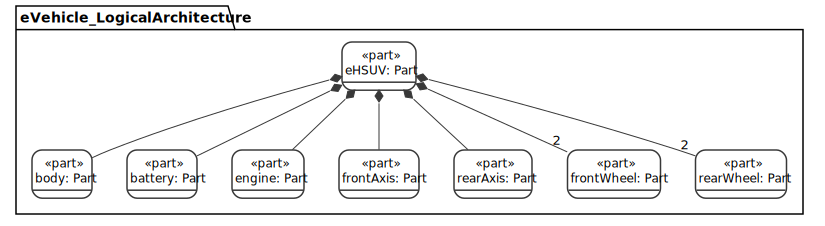

In [3]:
%viz eVehicle_LogicalArchitecture_v1

The diagram is only a view, and not an editor. A graphical editor is not provided in the pilot implementation. Future SysML v2 modeling tools will certainly offer graphical editors.

### Changes to SysML v1

SysML v2 is a complete new language with a different foundation than SysML v1. Therefore, there are plenty of differences. Here, we highlight only the changes that are most relevant to the modeler.

If I had modeled the eHSUV in SysML v1, I would have had to first define blocks and then part properties whose types are the blocks.

![eVehicle in SysML v1](evehicle-logical-architecture-sysmlv1.jpg)


### Parts and PartDefinitions

In SysML v2, you can define parts without types. However, you could define types if you like. A type can be used to reuse definitions. I extend our example and add a property to the wheel to specify the size. The type of the attribute is Integer. I skip units for now.

In [5]:
package eVehicle_LogicalArchitecture_v2 {
    
    import ScalarValues::Integer;
    
    part eHSUV {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel[2] {
            attribute size : Integer;
        }
        part rearWheel[2] {
            attribute size : Integer;
        }
    }
}

Package eVehicle_LogicalArchitecture_v2 (23aa141d-0426-4e99-8f5f-c49c7e70f898)


Run the cell with the SysML v2 model, and visualize the model. If you also would like to see the model structure, execute the %show command.

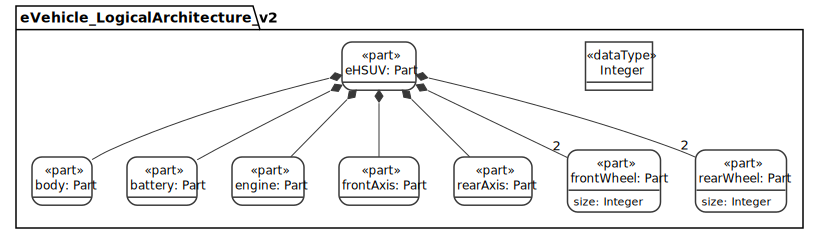

In [7]:
%viz eVehicle_LogicalArchitecture_v2

Although it is still very simple, the model already smells of reuse. The size attribute is currently defined twice. Now we define a type repsectively PartDefinition Wheels and specify that as the type of Parts.

In [9]:
package eVehicle_LogicalArchitecture_v3 {
    
    import ScalarValues::Integer;
    
    part def Wheel {
        attribute size : Integer;
    }
    
    part eHSUV {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
    }
}

Package eVehicle_LogicalArchitecture_v3 (3b0e1d24-6b73-42f0-8e54-9d482c8a2b1c)


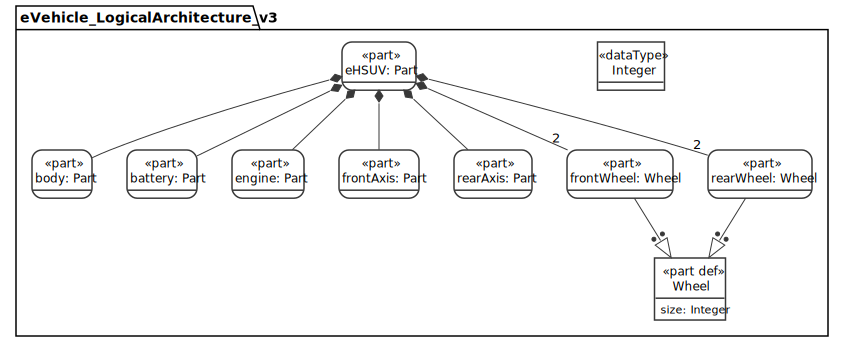

In [11]:
%viz eVehicle_LogicalArchitecture_v3

The attribute size itself can also be defined and reused for several attribute usages. It is a common concept in SysML v2 to separate  definition of elements and usage of elements. However, it is not mandatory and only partly useful in our example, because the size is only used at one place. But I added it anyhow as an example for attribute definitions.

In [1]:
package eVehicle_LogicalArchitecture_v4 {
    
    part def Wheel {
        attribute size : WheelSize;
    }
    
    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part eHSUV {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
    }
}

Package eVehicle_LogicalArchitecture_v4 (530a71cc-fb12-4921-ae6a-da974fe25461)


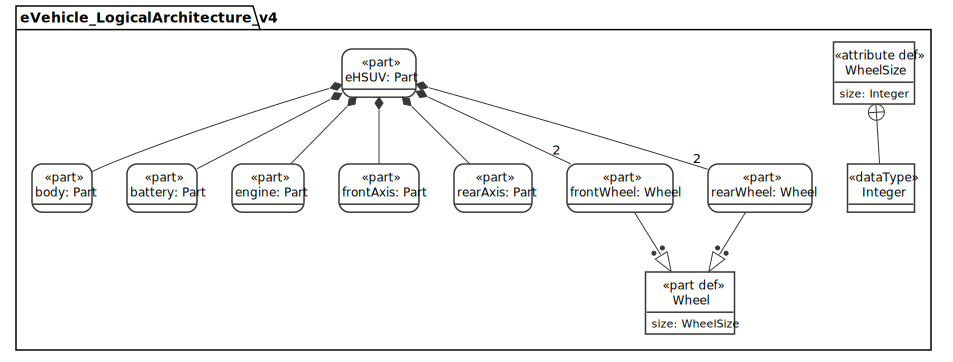

In [3]:
%viz eVehicle_LogicalArchitecture_v4

## Putting the parts together

In [4]:
package eVehicle_LogicalArchitecture_v5 {
    
    part def Wheel {
        attribute size : WheelSize;
    }
    
    attribute def WheelSize {
        import ScalarValues::Integer;
        size : Integer;
    }
    
    part eHSUV {    
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : Wheel[2];
        part rearWheel : Wheel[2];
        
        connect battery to engine;
        connect engine to frontAxis;
        connect frontAxis to frontWheel;
        connect rearAxis to rearWheel;
    }
}

Package eVehicle_LogicalArchitecture_v5 (7ff38477-7956-418d-9c8e-8d0ac49a586a)


## Modeling interfaces

## Modeling variants

## Satisfying requirements